# Notebook to Calculate RAV

In [1]:
import os
import shutil
import zipfile
import tarfile
import urllib
import requests
from pathlib import Path
from tqdm import tqdm
import h5py as h5

In [2]:
import numpy as np
import awkward as ak
import uproot
import vector
vector.register_awkward()

In [3]:
import matplotlib.pyplot as plt

In [4]:
import torch

/Users/billyli/miniforge_x86_new/envs/weaver/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
root_dir = Path("/Users/billyli/scope/JetClass/minimal")
list(root_dir.glob('*.root'))

[PosixPath('/Users/billyli/scope/JetClass/minimal/HToCC_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/WToQQ_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/ZToQQ_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/HToBB_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/HToGG_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/HToWW2Q1L_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/TTBarLep_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/TTBar_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/ZJetsToNuNu_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/HToWW4Q_120.root')]

In [6]:
f = list(root_dir.glob('*.root'))[0]
f.name.split('_')

['HToCC', '120.root']

In [7]:
example_file_path = "/Users/billyli/scope/JetClass/minimal/HtoBB_120.root"

## Get Jet Mass from Root Files

In [8]:
def feature_to_numpy(tree, feature):
    return tree[feature].arrays().to_numpy().astype(float)

In [9]:
jet_sdmass = {}
for f in root_dir.glob('*.root'):
    process = f.name.split('_')[0]
    tree = uproot.open(f)['tree']
    jet_sdmass[process] = feature_to_numpy(tree, 'jet_sdmass')
print(list(tree.keys()))

['part_px', 'part_py', 'part_pz', 'part_energy', 'part_deta', 'part_dphi', 'part_d0val', 'part_d0err', 'part_dzval', 'part_dzerr', 'part_charge', 'part_isChargedHadron', 'part_isNeutralHadron', 'part_isPhoton', 'part_isElectron', 'part_isMuon', 'label_QCD', 'label_Hbb', 'label_Hcc', 'label_Hgg', 'label_H4q', 'label_Hqql', 'label_Zqq', 'label_Wqq', 'label_Tbqq', 'label_Tbl', 'jet_pt', 'jet_eta', 'jet_phi', 'jet_energy', 'jet_nparticles', 'jet_sdmass', 'jet_tau1', 'jet_tau2', 'jet_tau3', 'jet_tau4', 'aux_genpart_eta', 'aux_genpart_phi', 'aux_genpart_pid', 'aux_genpart_pt', 'aux_truth_match']


In [10]:
jet_sdmass

{'HToCC': array([115.258255  , 111.84100342, 125.46985626, ..., 128.40882874,
        135.57939148, 141.51844788]),
 'WToQQ': array([72.61198425, 89.07801056, 76.53503418, ..., 76.12161255,
        79.85035706, 83.38143921]),
 'ZToQQ': array([ 84.99334717,  85.89722443,  80.36242676, ...,  94.44278717,
         72.22348022, 111.22592163]),
 'HToBB': array([236.60557556, 244.01182556, 113.34453583, ..., 125.35571289,
         45.36766052, 131.21665955]),
 'HToGG': array([122.22318268, 118.07779694, 120.23336029, ..., 120.01646423,
        119.24666595, 154.14793396]),
 'HToWW2Q1L': array([5.11340215e-04, 3.89420967e+01, 9.82005386e+01, ...,
        1.09459663e+02, 7.13239441e+01, 4.06601868e+01]),
 'TTBarLep': array([102.27770996,  74.19477081, 113.57976532, ..., 107.22871399,
        129.00959778, 142.58552551]),
 'TTBar': array([149.57839966,  80.48643494, 171.76864624, ..., 166.25233459,
        176.77210999, 178.86199951]),
 'ZJetsToNuNu': array([ 4.84817028,  7.31240273, 54.5573539

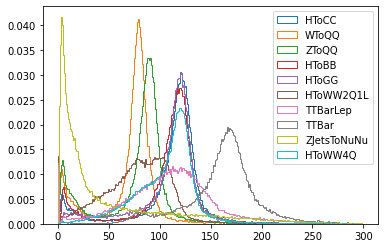

In [11]:
for k, v in jet_sdmass.items():
    plt.hist(v, label=k, bins=np.arange(0, 300, 1), density=True, histtype='step')
plt.legend()

(array([1.30609948e-04, 1.70797625e-04, 3.71736007e-04, 3.91829845e-04,
        4.92299037e-04, 3.21501412e-04, 3.61689088e-04, 3.51642169e-04,
        3.21501412e-04, 2.51172978e-04, 2.81313735e-04, 3.21501412e-04,
        2.61219897e-04, 2.81313735e-04, 1.90891463e-04, 1.50703787e-04,
        1.30609948e-04, 1.10516110e-04, 2.00938382e-04, 1.70797625e-04,
        1.90891463e-04, 1.70797625e-04, 1.10516110e-04, 1.30609948e-04,
        1.80844544e-04, 1.10516110e-04, 1.30609948e-04, 5.02345956e-05,
        9.04222720e-05, 1.30609948e-04, 1.70797625e-04, 1.60750706e-04,
        1.40656868e-04, 1.30609948e-04, 9.04222720e-05, 1.70797625e-04,
        1.30609948e-04, 1.70797625e-04, 1.90891463e-04, 1.20563029e-04,
        1.90891463e-04, 1.80844544e-04, 1.90891463e-04, 1.80844544e-04,
        2.41126059e-04, 2.51172978e-04, 1.70797625e-04, 1.90891463e-04,
        2.71266816e-04, 1.70797625e-04, 2.61219897e-04, 2.10985301e-04,
        2.41126059e-04, 2.71266816e-04, 2.91360654e-04, 4.018767

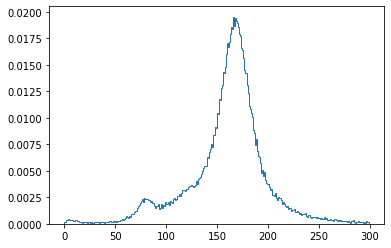

In [25]:
plt.hist(jet_sdmass['TTBar'], label='TTBar', bins=np.arange(0, 300, 1), density=True, histtype='step')

In [13]:
jet_sdmass.keys()

dict_keys(['HToCC', 'WToQQ', 'ZToQQ', 'HToBB', 'HToGG', 'HToWW2Q1L', 'TTBarLep', 'TTBar', 'ZJetsToNuNu', 'HToWW4Q'])

In [14]:
len(jet_sdmass['ZJetsToNuNu'])

100000

## Load the last class token

In [15]:
file = h5.File('/Users/billyli/scope/weaver-core/frac_3e-3.h5', 'r')

In [16]:
X = np.array(file['hidden_10'][:]).astype('double').squeeze(1)
print(X.shape, X.mean(axis=1), X.std(axis=1))

(3000, 128) [ 2.33712868  0.3182264   0.17937937 ...  0.17867706  0.9416515
 -0.07674761] [19.7748777  15.53458895 15.71584237 ... 14.00250027 19.20917268
 16.73535399]


## Linear Regression to get the coefficient vector

In [17]:
jet_sdmass_all_list = list(jet_sdmass.values())
jet_sdmass_all_list = [x[..., np.newaxis] for x in jet_sdmass_all_list]
jet_sdmass_all = np.concatenate(jet_sdmass_all_list, axis=0)
y_tensor = torch.tensor(jet_sdmass_all)

In [18]:
X_tensor = torch.tensor(X)
X_tensor = torch.cat([X_tensor, torch.ones(X_tensor.size(0), 1)], dim=1)

In [19]:
y_tensor = y_tensor[:3000, :]

In [20]:
w_tensor = torch.linalg.pinv(X_tensor.T @ X_tensor) @ (X_tensor.T @ y_tensor)

In [21]:
w_tensor

tensor([[-1.4200e+00],
        [ 1.4255e+01],
        [-5.0666e+00],
        [-2.0199e+00],
        [ 1.3828e+00],
        [-1.9210e+00],
        [-9.5862e-01],
        [-1.9944e+00],
        [ 4.2703e-01],
        [-7.3642e+00],
        [-2.1689e+00],
        [-5.9196e+00],
        [ 3.4211e-01],
        [ 9.0432e-01],
        [-1.0796e-01],
        [ 9.6821e+00],
        [ 3.1387e-01],
        [-2.2494e-01],
        [-9.1670e-01],
        [-3.1825e-01],
        [ 6.0369e-01],
        [ 4.6363e+00],
        [-3.2514e+00],
        [ 3.4157e+00],
        [ 6.4752e-01],
        [ 3.0795e+00],
        [-3.0745e+00],
        [-2.2263e+00],
        [-3.5331e-01],
        [ 5.4695e+00],
        [-1.4284e+00],
        [ 3.9105e+00],
        [-9.1505e-01],
        [-2.6375e+00],
        [ 3.4355e-01],
        [-2.2149e+00],
        [ 7.0782e+00],
        [-2.2598e+00],
        [-1.7814e+00],
        [-7.0060e+00],
        [ 5.8649e+00],
        [ 4.4161e-01],
        [-1.5693e+00],
        [-6

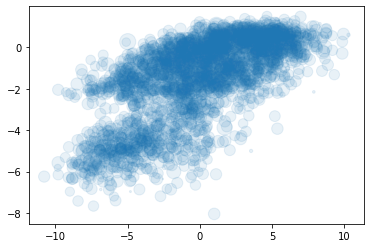

In [22]:
plt.scatter(X[:, 0], X[:, 1], s=y_tensor, alpha=0.1)
# def func(x, w):
#     return x * w[0] / w[1]
# plt.scatter(X[:, 0], func(X[:, 0], w_tensor.numpy()), color='red')

In [23]:
len(jet_sdmass_all_list)

10

In [24]:
with h5.File("rav_sdmass.h5", 'w') as f:
    f.create_dataset('RAV_jet_sdmass', data=w_tensor.cpu().numpy())